In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data\jobPlace.csv')

# Define the mapping dictionaries
gender_mapping = {
    'Male': 0,
    'Female': 1
}

stream_mapping = {
    'Computer Science': 0,
    'Information Technology': 1,
    'Electrical': 2,
    'Electronics And Communication': 3,
    'Mechanical': 4,
    'Civil': 5
}

# Apply the mappings to the respective columns
data['Gender'] = data['Gender'].map(gender_mapping)
data['Stream'] = data['Stream'].map(stream_mapping)

# Save the updated dataset
data.to_csv('data\jobPlace_td.csv', index=False)


In [1]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('data\jobPlace_td.csv')

# Print count of 'Placed' for each category
print(data.groupby('Age')['PlacedOrNot'].sum())
print(data.groupby('Gender')['PlacedOrNot'].sum())
print(data.groupby('Stream')['PlacedOrNot'].sum())
print(data.groupby('Internships')['PlacedOrNot'].sum())
print(data.groupby('CGPA')['PlacedOrNot'].sum())
print(data.groupby('Hostel')['PlacedOrNot'].sum())
print(data.groupby('HistoryOfBacklogs')['PlacedOrNot'].sum())


Age
19     92
20    199
21    617
22    478
23     85
24    104
25     22
26     37
28      3
29      1
30      1
Name: PlacedOrNot, dtype: int64
Gender
0    1364
1     275
Name: PlacedOrNot, dtype: int64
Stream
0    452
1    409
2    181
3    251
4    200
5    146
Name: PlacedOrNot, dtype: int64
Internships
0    654
1    662
2    282
3     41
Name: PlacedOrNot, dtype: int64
CGPA
5      7
6    270
7    282
8    915
9    165
Name: PlacedOrNot, dtype: int64
Hostel
0    1223
1     416
Name: PlacedOrNot, dtype: int64
HistoryOfBacklogs
0    1337
1     302
Name: PlacedOrNot, dtype: int64


**GradientBoostingClassifier**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv('/content/jobPlace_td.csv')

# Separate features (X) and target variable (y)
X = data.drop('PlacedOrNot', axis=1)
y = data['PlacedOrNot']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting classifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Function to preprocess user input
def preprocess_input(Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs):
    return Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs

# Function to predict placement based on user input
def predict_placement(Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs):
    input_data = preprocess_input(Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs)
    prediction = model.predict([input_data])
    probability = model.predict_proba([input_data])[0]
    if prediction[0] == 1:
        return "Candidate Should Be Placed!!", probability[1]
    else:1
    return "Candidate Should Not Be Placed!!", probability[0]

# User Inputs
Age = input("Enter Age: ")
Gender = input("Enter Gender: ")
Stream = input("Enter Stream: ")
Internships = input("Enter Internship: ")
CGPA = input("Enter CGPA: ")
Hostel = input("Enter Hostel: ")
HistoryOfBacklogs = input("Enter History of Backlogs: ")

result, probability = predict_placement(Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs)
print(result, "[Probability: {:.2f}%]".format(probability * 100))

print("Given Inputs:")
print("Age:", Age)
print("Gender:", Gender)
print("Stream:", Stream)
print("Internship:", Internships)
print("CGPA:", CGPA)
print("Hostel:", Hostel)
print("History of Backlogs:", HistoryOfBacklogs)



Candidate Should Be Placed!! [Probability: 99.77%]
Given Inputs:
Age: 21
Gender: 0
Stream: 0
Internship: 1
CGPA: 8
Hostel: 0
History of Backlogs: 0


c:\Users\jayed\Documents\jayed\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\jayed\Documents\jayed\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


**Importance**

             Feature  Importance
0             Gender    0.000881
1             Hostel    0.001110
2  HistoryOfBacklogs    0.015371
3             Stream    0.034360
4                Age    0.079456
5        Internships    0.097472
6               CGPA    0.771350


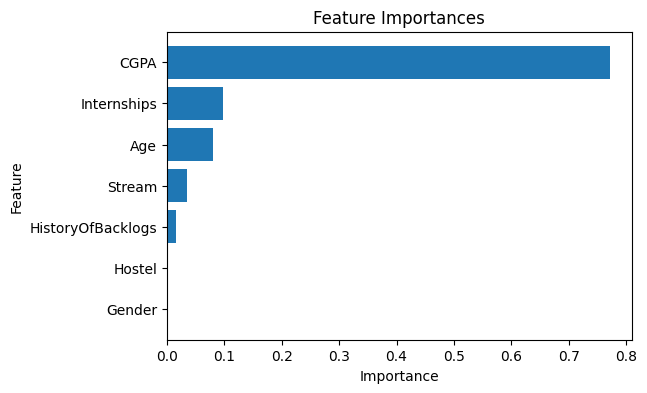

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Models ------------------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Load the CSV file
data = pd.read_csv('data/jobPlace_td.csv')

# Separate features (X) and target variable (y)
X = data.drop('PlacedOrNot', axis=1)
y = data['PlacedOrNot']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
# model = RandomForestClassifier()
# model = LogisticRegression()
# model = DecisionTreeClassifier()
# model = SVC()
model = GradientBoostingClassifier()
# model = MLPClassifier()

model.fit(X_train, y_train)

# Retrieve feature importances
importances = model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=True).reset_index(drop=True)
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(6, 4))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()



**MLP**


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv('data\jobPlace_td.csv')

# Separate features (X) and target variable (y)
X = data.drop('PlacedOrNot', axis=1)
y = data['PlacedOrNot']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an Artificial Neural Network classifier
model = MLPClassifier(hidden_layer_sizes=(1000, 1000), random_state=42)
model.fit(X_train, y_train)

# Function to preprocess user input
def preprocess_input(age, gender, stream, internships, cgpa, hostel, backlogs):
    return age, gender, stream, internships, cgpa, hostel, backlogs

# Function to predict placement based on user input
def predict_placement(age, gender, stream, internships, cgpa, hostel, backlogs):
    input_data = preprocess_input(age, gender, stream, internships, cgpa, hostel, backlogs)
    input_data = [int(i) if isinstance(i, str) else i for i in input_data]  # Convert to integers if input is string
    prediction = model.predict([input_data])
    probability = model.predict_proba([input_data])[0]
    if prediction[0] == 1:
        return "Candidate Should Be Placed!!", probability[1]
    else:
        return "Candidate Should Not Be Placed!!", probability[0]

# User Inputs
age = input("Enter Age: ")
gender = input("Enter Gender: ")
stream = input("Enter Stream: ")
internships = input("Enter Internship: ")
cgpa = input("Enter CGPA: ")
hostel = input("Enter Hostel: ")
backlogs = input("Enter History of Backlogs: ")

result, probability = predict_placement(age, gender, stream, internships, cgpa, hostel, backlogs)
print(result, "[Probability: {:.2f}%]".format(probability * 100))

print("Given Inputs:")
print("Age:", age)
print("Gender:", gender)
print("Stream:", stream)
print("Internship:", internships)
print("CGPA:", cgpa)
print("Hostel:", hostel)
print("History of Backlogs:", backlogs)


Candidate Should Be Placed!! [Probability: 99.88%]
Given Inputs:
Age: 21
Gender: 1
Stream: 1
Internship: 0
CGPA: 8
Hostel: 1
History of Backlogs: 1


c:\Users\jayed\Documents\jayed\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\jayed\Documents\jayed\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


**Unique**

In [14]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('data\jobPlace_td.csv')

# Convert columns to numeric
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Gender'] = pd.to_numeric(data['Gender'], errors='coerce')
data['Stream'] = pd.to_numeric(data['Stream'], errors='coerce')
data['Internships'] = pd.to_numeric(data['Internships'], errors='coerce')
data['CGPA'] = pd.to_numeric(data['CGPA'], errors='coerce')
data['Hostel'] = pd.to_numeric(data['Hostel'], errors='coerce')
data['HistoryOfBacklogs'] = pd.to_numeric(data['HistoryOfBacklogs'], errors='coerce')
data['PlacedOrNot'] = pd.to_numeric(data['PlacedOrNot'], errors='coerce')

# Check unique values in each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in Age: [22 21 23 24 28 30 25 26 20 19 29]
Unique values in Gender: [0 1]
Unique values in Stream: [3 0 1 4 2 5]
Unique values in Internships: [1 0 2 3]
Unique values in CGPA: [8 7 6 9 5]
Unique values in Hostel: [1 0]
Unique values in HistoryOfBacklogs: [1 0]
Unique values in PlacedOrNot: [1 0]
